In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.special import ndtr
from iCOS import iCOS

In [2]:
strikes = np.linspace(800, 1300, 1001)
r = 0.05
T = 1
S = 1000
sigma = 0.3

d1 = (np.log(S / strikes) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

calls = ndtr(d1) * S - ndtr(d2) * strikes * np.exp(-r * T)
puts = ndtr(-d2) * strikes * np.exp(-r * T) - ndtr(-d1) * S



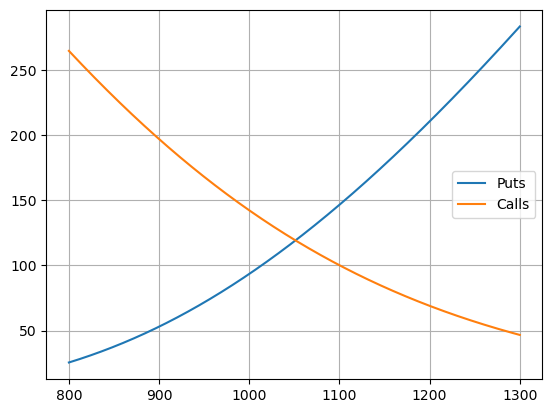

In [3]:
plt.plot(strikes, puts)
plt.plot(strikes, calls)
plt.grid()
plt.legend(['Puts', 'Calls'])
plt.show()

In [8]:
icos = iCOS(S, T, r)
icos.fit(strikes, calls, puts, N=14)
calls_pred = icos.call_price(strikes)

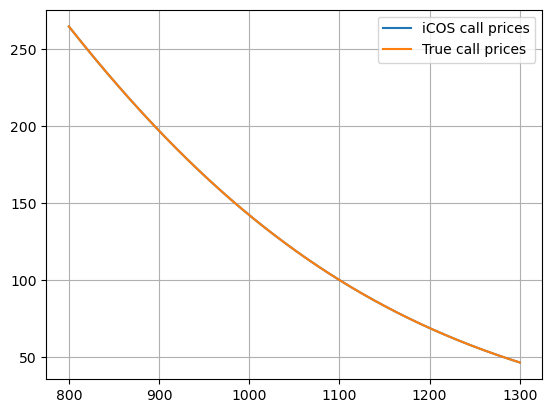

In [13]:
plt.plot(strikes, calls_pred)
plt.plot(strikes, calls)

plt.grid()
plt.legend(['iCOS call prices', 'True call prices'])
plt.show()

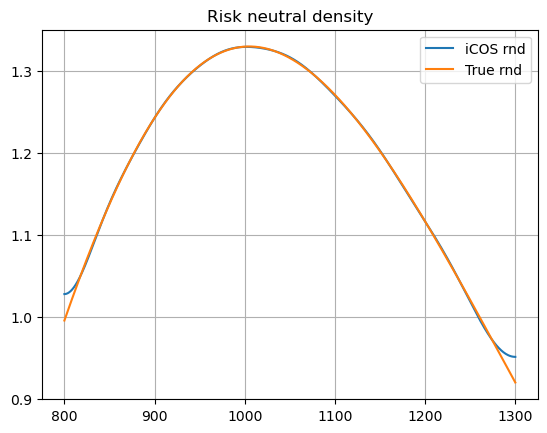

In [11]:
x, f = icos.rnd()
plt.plot(np.exp(x), f)
plt.plot(np.exp(x), np.exp(- (x - np.log(S) - (r - sigma**2 / 2)*T)**2 / (2 * T * sigma**2)) / np.sqrt(2*np.pi*T*sigma**2))
plt.grid()
plt.title('Risk neutral density')
plt.legend(['iCOS rnd', 'True rnd'])
plt.show()